# Chicago Crimes Data Filtering

## load data between 2012 and 2017

In [138]:
import random
import json
from random import choices
from random import seed
from adjustText import adjust_text
import pandas as pd
import numpy as np
import shapely.wkt
from shapely.geometry.point import Point
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib
import matplotlib.cm as cm
from matplotlib import colors

In [105]:
chicago = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv')

In [106]:
chicago.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [107]:
chicago.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [108]:
len(chicago)

1456714

## sample 1/4 of the data

In [109]:
sample = chicago.copy()

In [110]:
# drop 3/4 rows of the data uniformly
drop_indices = np.random.choice(sample.index, int(3 * len(sample) / 4), replace=False)
sample = sample.drop(drop_indices)

In [111]:
len(sample)

364179

In [112]:
sample.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
14,2477,10508728,HZ250505,05/03/2016 10:08:00 PM,016XX N CLAREMONT AVE,0810,THEFT,OVER $500,STREET,False,...,1.0,24.0,06,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)"
18,3242,10508747,HZ250577,05/03/2016 08:00:00 PM,100XX S SANGAMON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,34.0,73.0,07,1171751.0,1838335.0,2016,05/10/2016 03:56:50 PM,41.711844,-87.646608,"(41.711843569, -87.646607932)"


In [113]:
sample.to_csv('chicago_sample.csv', sep=',')

## drop unnecessary columns

In [114]:
clean_sample = sample.copy()

In [115]:
clean_sample.drop(['X Coordinate', 'Y Coordinate', 'Location', 'Updated On', 'IUCR', 'Unnamed: 0', 'Block', 'Case Number', 'Ward', 'Community Area'], axis=1, inplace=True)

In [116]:
clean_sample.to_csv('chicago_clean_sample.csv', sep=',')

In [117]:
clean_sample.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Latitude,Longitude
3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,08B,2016,41.885687,-87.749516
6,10508703,05/03/2016 10:30:00 PM,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,133,1.0,08B,2016,41.844024,-87.626923
8,10508709,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,08B,2016,41.998131,-87.665814
14,10508728,05/03/2016 10:08:00 PM,THEFT,OVER $500,STREET,False,False,1434,14.0,06,2016,41.910901,-87.686019
18,10508747,05/03/2016 08:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2232,22.0,07,2016,41.711844,-87.646608


In [118]:
clean_sample.describe()

,ID,Beat,District,Year,Latitude,Longitude
count,3.641790e+05,364179.000000,364179.000000,364179.000000,355029.000000,355029.000000
mean,9.598956e+06,1150.264614,11.255259,2013.900126,41.841447,-87.672203
std,8.086103e+05,691.640873,6.904382,1.450083,0.093274,0.065856
min,2.022700e+04,111.000000,1.000000,2012.000000,36.619446,-91.686566
25%,9.002772e+06,613.000000,6.000000,2013.000000,41.767939,-87.715400
50%,9.608623e+06,1024.000000,10.000000,2014.000000,41.857895,-87.666044
75%,1.022709e+07,1711.000000,17.000000,2015.000000,41.904986,-87.628152
max,1.082786e+07,2535.000000,31.000000,2017.000000,42.022586,-87.524529


# neighborhoods heatmap

In [9]:
seed(42)

In [10]:
chicago = pd.read_csv('data/chicago_clean_sample.csv')

In [11]:
chicago = chicago.dropna(subset=['Latitude', 'Longitude'])

In [12]:
chicago.head()

,Unnamed: 0,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Latitude,Longitude
0,1,10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,08B,2016,41.782922,-87.604363
1,3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,08B,2016,41.885687,-87.749516
2,8,10508709,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,08B,2016,41.998131,-87.665814
3,9,10508982,05/03/2016 10:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,735,7.0,08B,2016,41.768097,-87.663879
4,27,10509077,05/03/2016 12:01:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,915,9.0,11,2016,41.834586,-87.632285


In [13]:
crime_lats = chicago['Latitude']
crime_lons = chicago['Longitude']

In [14]:
crime_points = [Point(lon, lat) for lon, lat in zip(crime_lons, crime_lats)]

In [160]:
crime_points_sample = choices(crime_points, k=50_000)

In [161]:
crime_points_sample = [p for p in crime_points_sample if p.y > 41]

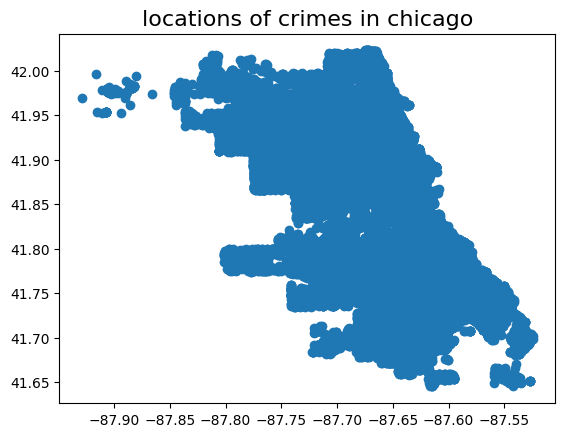

In [162]:
fontsize=16
plt.title('locations of crimes in chicago', fontsize=fontsize)
plt.scatter([p.x for p in crime_points_sample], [p.y for p in crime_points_sample])

In [163]:
f = open('data/chicago_neighborhoods.json')
neighborhoods_json = json.load(f)

In [164]:
neighborhoods = [(nj[-4], list(shapely.wkt.loads(nj[-5]))[0]) for nj in neighborhoods_json['data']]

/var/folders/k3/njy_phnd1t377mlygnjxkmbh0000gn/T/ipykernel_1382/2314810348.py:1: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  neighborhoods = [(nj[-4], list(shapely.wkt.loads(nj[-5]))[0]) for nj in neighborhoods_json['data']]
/var/folders/k3/njy_phnd1t377mlygnjxkmbh0000gn/T/ipykernel_1382/2314810348.py:1: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  neighborhoods = [(nj[-4], list(shapely.wkt.loads(nj[-5]))[0]) for nj in neighborhoods_json['data']]


In [165]:
fontsize=20

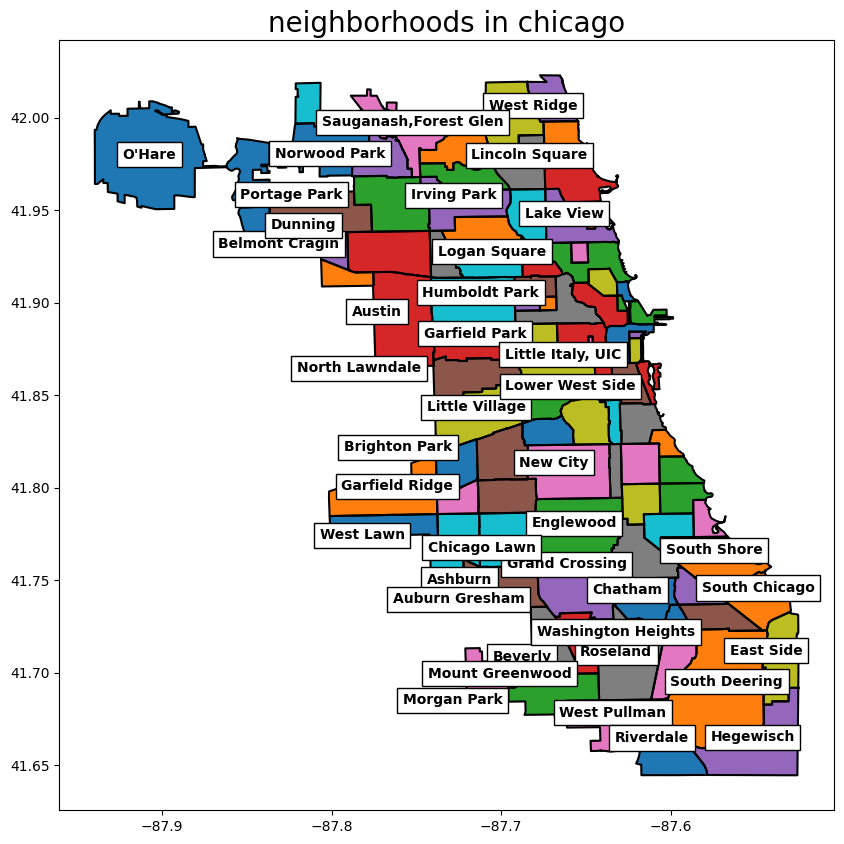

In [166]:
plt.figure(figsize=(10,10))
plt.title('neighborhoods in chicago', fontsize=fontsize)

i=0
ts=[]
for neighborhood in sorted(neighborhoods, key=lambda n:n[1].area, reverse=True):
    name, polygon = neighborhood
    x,y = polygon.exterior.xy
    plt.fill(x,y)
    plt.plot(x,y, color='black')
    if i < 40:
        i+=1
        t = plt.text(polygon.centroid.x - 0.03, polygon.centroid.y, name, fontsize=10, weight='bold')
        t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
        ts.append(t)
adjust_text(ts, only_move={'points':'y', 'texts':'y'})
plt.savefig('./plots/neighborhoods.png')

In [168]:
neighborhoods_crimes_count = {name: 0 for name, polygons in neighborhoods}

In [169]:
for point in crime_points:
    for neighborhood in neighborhoods:
        name, polygon = neighborhood
        if polygon.contains(point):
            neighborhoods_crimes_count[name] += 1

In [170]:
total_crimes_count = sum(neighborhoods_crimes_count.values())

In [171]:
normalize = colors.Normalize(vmin=min(neighborhoods_crimes_count.values()),
                             vmax=max(neighborhoods_crimes_count.values()))
cmap = plt.cm.get_cmap('Reds')

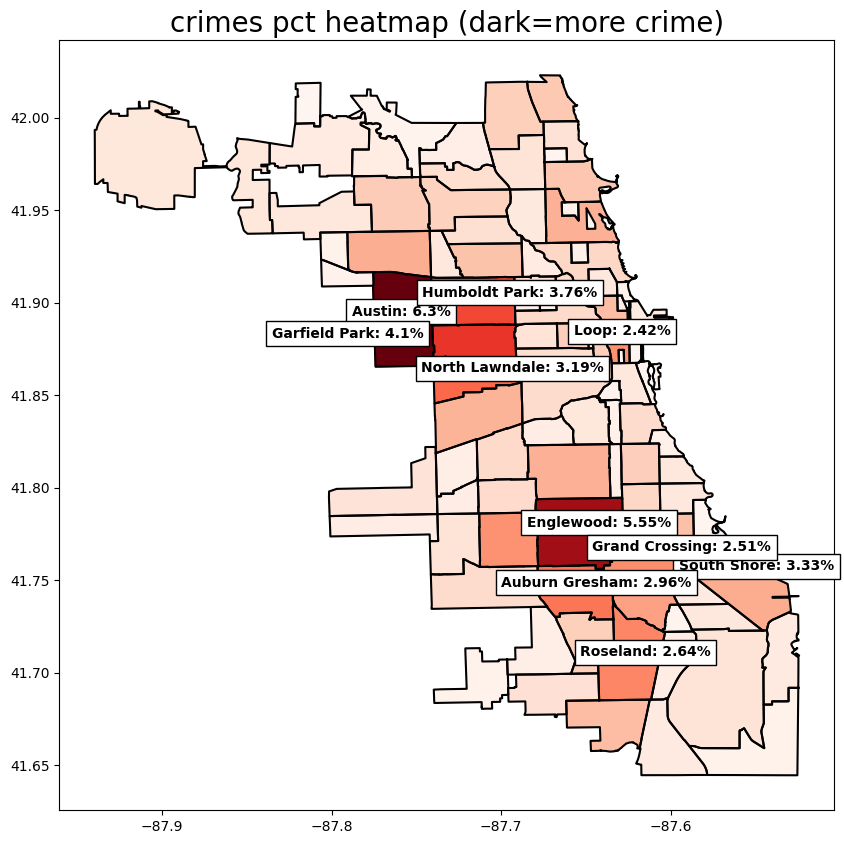

In [172]:
plt.figure(figsize=(10,10))
plt.title('crimes pct heatmap (dark=more crime)', fontsize=fontsize)

i=0
ts = []
for neighborhood in sorted(neighborhoods, key=lambda n:neighborhoods_crimes_count[n[0]], reverse=True):
    name, polygon = neighborhood
    x,y = polygon.exterior.xy
    plt.fill(x,y, color=cmap(normalize(neighborhoods_crimes_count[name])))
    plt.plot(x,y, color='black')
    if i < 10:
        i+=1
        t = plt.text(polygon.centroid.x - 0.03, polygon.centroid.y, f'{name}: {round(100*neighborhoods_crimes_count[name] / total_crimes_count, 2)}%', fontsize=10, color='black', weight='bold', zorder=30)
        t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
        ts.append(t)
adjust_text(ts, only_move={'points':'y', 'texts':'y'})

plt.savefig('./plots/pct_heatmap.png')

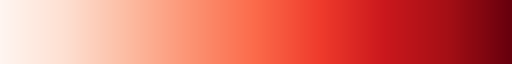

In [173]:
s = sorted([neighborhoods_crimes_count[n[0]] / n[1].area for n in neighborhoods])
minima = s[1]
maxima = s[-2]
normalize = colors.Normalize(vmin=minima,
                             vmax=maxima)
cmap = plt.cm.get_cmap('Reds')
cmap

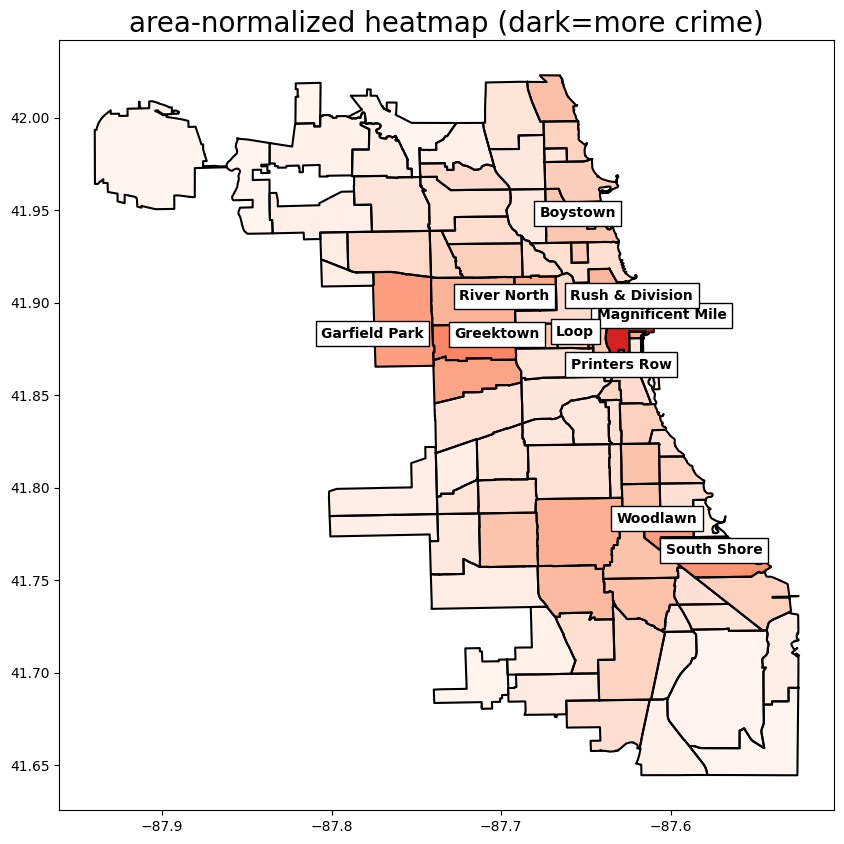

In [174]:
plt.figure(figsize=(10,10))
plt.title('area-normalized heatmap (dark=more crime)', fontsize=fontsize)

i=0
ts=[]
for neighborhood in sorted(neighborhoods, key=lambda n:neighborhoods_crimes_count[n[0]] / n[1].area, reverse=True):
    name, polygon = neighborhood
    x,y = polygon.exterior.xy
    plt.fill(x,y, color=cmap(normalize(neighborhoods_crimes_count[name] / polygon.area)))
    plt.plot(x,y, color='black')
    if i < 10:
        i+=1
        t = plt.text(polygon.centroid.x - 0.03, polygon.centroid.y, f'{name}', fontsize=10, color='black', weight='bold', zorder=30)
        t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
        ts.append(t)
adjust_text(ts, only_move={'points':'y', 'texts':'y'})

plt.savefig('./plots/normalized_heatmap.png')